In [27]:
import re
import nltk
import numpy as np
import pandas as pd
import pickle as pkl
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve, auc
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from nltk.stem.wordnet import WordNetLemmatizer

import math

In [16]:
def tokenize(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = [ token for token in tokens if re.search('(^[a-zA-Z]+$)', token) ]
    #a=[]
    #for i in filtered_tokens:
    #    a.append(WordNetLemmatizer().lemmatize(i,'v'))
    #return a
    return filtered_tokens


cachedStopWords = stopwords.words("english") + ['age','ago','also','already',
                                                'x','year', 'old', 'man', 'woman', 'ap',
                                                'am', 'pm', 'portable', 'pa', 'lat', 
                                                'admitting', 'diagnosis', 'lateral',
                                               'bb','bp','c','daily','data','date']




In [28]:
file = open('corpus.pkl','rb')
corpus = pkl.load(file)
file.close()
#corpusList = list(corpus.values())
#labels = list(corpus.keys())
corpusList=corpus[corpus.columns[0]].tolist()
labels=corpus[corpus.columns[1]].tolist()



## 22.7% is 1 , 77.27% is 0
1-np.sum(labels)/len(labels) 



0.77272727272727271

In [29]:
bleed = corpus[corpus[corpus.columns[1]]==1]
bleed = bleed.reset_index()
bleed = bleed.drop('index',axis=1)
print(len(bleed))


no_bleed = corpus[corpus[corpus.columns[1]]==0]
no_bleed = no_bleed.reset_index()
no_bleed = no_bleed.drop('index',axis=1)
print(len(no_bleed))


225
765


In [30]:
import random

rd_no_bleed = no_bleed.iloc[np.random.choice(len(no_bleed), replace=False, size=len(bleed))]


all_data =bleed.append(rd_no_bleed, ignore_index=True)






print(len(test_data))
len(all_data)



350


450

In [31]:
corpusList=all_data[all_data.columns[0]].tolist()
labels=all_data[all_data.columns[1]].tolist()

## 22.7% is 1 , 77.27% is 0
1-np.sum(labels)/len(labels) 

0.5

In [ ]:
######

from nltk.stem.wordnet import WordNetLemmatizer
words = ['gave','went','going','dating']
for word in words:
    print( word+"-->"+WordNetLemmatizer().lemmatize(word,'v'))
    
###

In [ ]:

###
cv = TfidfVectorizer(lowercase=True, max_features=None, preprocessor=None, stop_words=cachedStopWords,
                    strip_accents=None, tokenizer=tokenize, vocabulary=None)
X = cv.fit_transform(corpusList)
print(X.shape)
print()
lexicon = cv.get_feature_names()
#print (lexicon)
print()

In [32]:
def tokenize(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = [ token for token in tokens if re.search('(^[a-zA-Z]+$)', token) ]
    a=[]
    for i in filtered_tokens:
        a.append(WordNetLemmatizer().lemmatize(i,'v'))
    return a
    #return filtered_tokens


cachedStopWords = stopwords.words("english") + ['age','ago','also','already',
                                                'x','year', 'old', 'man', 'woman', 'ap',
                                                'am', 'pm', 'portable', 'pa', 'lat', 
                                                'admitting', 'diagnosis', 'lateral',
                                               'bb','bp','c','daily','data','date','abd','abg',
                                               'mg','ast','av','ck','cm','cr','cv','cvp','cpk','cx','day','dp','ed','f','ffp'
                                               ,'hct','hd','icu','ii','id','ml','af','arf','bs',
                                               'cc','ccu','hr','ef','fen','hpi','l','k','r','ra','abx'
                                               'alk','phos','iv','ext','gi','iv','ivf','ni','ng','vs','vt','yo','yn',
                                               'zosyn','kg','abx','alk','alt','ckmb','ct','cta','p','pe','po','c','ck','ca'
                                               'q','cr','ni','ett','iv','g','h','j','k','l','z','x','c','v','b','n','m','i','ii',
                                               'iii','iv','kg','lll','lvh','mb','mcg','md','ml','xl','wnl','wgt',
                                                'q','w','e','r','t','y','u','i','o','p','first','gm','hcl','hs','hrs',
                                               'inr','mmm','mr','mri','mrsa','ms','lf','nl','ns','nsr','sh','nt','tf','tr'
                                               ,'wbc','plt','bcx','bph','bmp','mmhg','bps','sq','ld','ce','cbc','ckd',
                                               'cp','cxr','cva','cvicu','dm','dr','name','ep','er','gtt','iabp','cxr',
                                               'jvd','jvp','pt','kvo','lbs','na','nad','nd','nph','npo','osh',
                                               ]


In [33]:
cv = TfidfVectorizer(lowercase=True, max_df=0.780, max_features=None, min_df=0.025,
                     ngram_range=(1, 2), preprocessor=None, stop_words=cachedStopWords,
                     strip_accents=None, tokenizer=tokenize, vocabulary=None)
X = cv.fit_transform(corpusList)
print(X.shape)
print()
lexicon = cv.get_feature_names()
print (lexicon)
print()

(450, 3906)

['aaa', 'abdomen', 'abdomen nutrition', 'abdomen obese', 'abdomen pelvis', 'abdomen soft', 'abdominal', 'abdominal pain', 'abdominal soft', 'abdominial', 'abdominial bruit', 'ablation', 'able', 'abnormal', 'abnormalities', 'abnormality', 'abscess', 'absence', 'absent', 'absent leave', 'absent skin', 'abuse', 'ac', 'access', 'access piv', 'accessory', 'accessory muscle', 'accident', 'accord', 'ace', 'ace inhibitor', 'acei', 'acetaminophen', 'acetaminophen albuterol', 'acetaminophen tablet', 'acid', 'acidosis', 'acquire', 'across', 'acs', 'active', 'active bleed', 'activity', 'activity status', 'acute', 'acute acute', 'acute chronic', 'acute distress', 'acute last', 'acute onset', 'acute pain', 'acute process', 'acute renal', 'acute respiratory', 'add', 'add follow', 'addendum', 'addendum enter', 'addition', 'additional', 'additionally', 'address', 'adequate', 'adequate uo', 'adjacent', 'adjust', 'administer', 'administration', 'admission aspirin', 'admission blood', 'admiss

In [34]:
Y = np.array(labels)
Y  ##sklearn feature selection selectkbest 

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [35]:
#ExtraTreesClassifier(bootstrap=False, class_weight='balanced',
        #   criterion='gini', max_depth=None, max_features='auto',
        #   max_leaf_nodes=None, min_impurity_split=1e-07,
        #   min_samples_leaf=1, min_samples_split=2,
        #   min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
        #   oob_score=False, random_state=None, verbose=0, warm_start=False)
        
        
model=0
results = []
cont = []
kf = KFold(n_splits=10, shuffle=True)
trees = [ 100]
for t in range(len(trees)):
    fold = 1
    truth = []
    rf_prediction = []
    print("model ", t, ": ExtraTreesClassifier = " + str(trees[t]))
    test_count = 0
    rf = ExtraTreesClassifier(bootstrap=False,
           criterion='gini', max_depth=None, max_features=0.75421,class_weight='balanced',
           max_leaf_nodes=None, min_impurity_decrease=1e-05,
           min_samples_leaf=2, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
    for train_idx, test_idx in kf.split(X):
        trainX = X[train_idx]
        trainY = Y[train_idx]
        testX = X[test_idx]
        testY = Y[test_idx]
        truth.append(testY)
        rf.fit(trainX, trainY)
        Y_hat = rf.predict(testX)
        rf_prediction.append(Y_hat)
        print("   Fold %d accuracy: %.2f %%" % (fold, ((np.sum(Y_hat == testY)/len(testY)) * 100.0)))                        
        fold += 1
    truth = np.concatenate(truth, axis=0)    
    rf_prediction = np.concatenate(rf_prediction, axis=0)
    test_results = np.sum(rf_prediction == truth)/len(truth)
    print("     Overall test accuracy: %.2f %%" % (test_results * 100))  
    rf = rf.fit(X, Y)
    Y_hat = rf.predict(X)
    train_results = np.sum(Y_hat == Y)/len(Y)
    print("     Overall training accuracy: %.2f %%" % (train_results * 100.0))  
    results.append([train_results, test_results])   
    cont.append([truth, rf_prediction])

model  0 : ExtraTreesClassifier = 100
   Fold 1 accuracy: 97.78 %
   Fold 2 accuracy: 84.44 %
   Fold 3 accuracy: 73.33 %
   Fold 4 accuracy: 88.89 %
   Fold 5 accuracy: 84.44 %
   Fold 6 accuracy: 93.33 %
   Fold 7 accuracy: 86.67 %
   Fold 8 accuracy: 84.44 %
   Fold 9 accuracy: 86.67 %
   Fold 10 accuracy: 86.67 %
     Overall test accuracy: 86.67 %
     Overall training accuracy: 100.00 %


In [36]:
model = input("Enter Best Model: ")
best = cont[int(model)]
rf_ct = pd.crosstab(best[1], best[0], margins=True)
rf_ct.columns = ["Other", "PNA", "Total"]
rf_ct.index = ["Other", "PNA", "Total"]
print()
print("Random Forest")
print(rf_ct)
print()


Enter Best Model: 0

Random Forest
       Other  PNA  Total
Other    189   24    213
PNA       36  201    237
Total    225  225    450



In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score,f1_score,precision_score,accuracy_score,classification_report
y_true =cont[int(model)][0]
y_pred = cont[int(model)][1]
print(confusion_matrix(y_true, y_pred))
print(f1_score(y_true, y_pred) )



print(recall_score(y_true, y_pred),   )
print(precision_score(y_true, y_pred))
print(accuracy_score(y_true, y_pred))

print(classification_report(y_true, y_pred))


[[189  36]
 [ 24 201]]
0.87012987013
0.893333333333
0.848101265823
0.866666666667
             precision    recall  f1-score   support

          0       0.89      0.84      0.86       225
          1       0.85      0.89      0.87       225

avg / total       0.87      0.87      0.87       450



In [38]:

Sens = rf_ct.iloc[1][1]/rf_ct.iloc[2][1]
Spec = rf_ct.iloc[0][0]/rf_ct.iloc[2][0]
PPV = rf_ct.iloc[1][1]/rf_ct.iloc[1][2]
NPV = rf_ct.iloc[0][0]/rf_ct.iloc[0][2]
ACC = (rf_ct.iloc[0][0] + rf_ct.iloc[1][1]) / rf_ct.iloc[2][2]
print("Random Forest: Sensitivity: %.5f Specificity: %.5f PPV: %.5f NPV: %.5f Accuracy: %.5f" % (Sens, Spec, PPV, NPV, ACC))

Random Forest: Sensitivity: 0.89333 Specificity: 0.84000 PPV: 0.84810 NPV: 0.88732 Accuracy: 0.86667


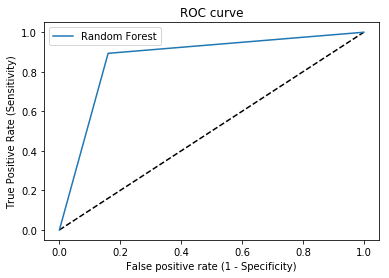

AUC =  0.866666666667


In [39]:

rf_fpr, rf_tpr, rf_thresholds = roc_curve(best[0], best[1], pos_label=1)
roc_auc = auc(rf_fpr, rf_tpr)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(rf_fpr, rf_tpr, label='Random Forest')
plt.xlabel('False positive rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
print("AUC = ", roc_auc)

In [11]:
from sklearn.model_selection import KFold  
import numpy as np  
X = np.arange(24).reshape(12,2)  
y = np.random.choice([1,2],12,p=[0.4,0.6])  
kf = KFold(n_splits=4,shuffle=False)  
for train_index , test_index in kf.split(X):  
    print('train_index:%s , test_index: %s ' %(train_index,test_index)) 

train_index:[ 3  4  5  6  7  8  9 10 11] , test_index: [0 1 2] 
train_index:[ 0  1  2  6  7  8  9 10 11] , test_index: [3 4 5] 
train_index:[ 0  1  2  3  4  5  9 10 11] , test_index: [6 7 8] 
train_index:[0 1 2 3 4 5 6 7 8] , test_index: [ 9 10 11] 
